<a href="https://colab.research.google.com/github/Sinha123456/Kaggle_projects/blob/master/No_show_appointment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project details and working platform:**
## No show appointment project is done by google colab platform.
## For this project data is provided by the kaggle. 
## This dataset collects informationfrom 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. 


# Mounted drive
Data can be access from drive to colab notebook

In [78]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import packages

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt

Loding a data, using pandas read function.

In [4]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/udacity_projects/noshowappointments-kagglev2-may-2016.csv')
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Data Wrangling

In [79]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No_show           0
Sch_Day           0
Appt_Day          0
no_show           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(110527, 14)

**Data wranling investigation:**
There are no null values and duplicated attributes in the dataset. There are 110527 rows and 14 columns in the dataset.
. ScheduledDay and AppointmentDay columns are in string, need to be parse in date time columns.In the age column mean age is 37, min age -1, and max age 115, need to investigate more about the age column. Very few patients are Alcoholism and Handicap.

# **Data Cleaning**

* dropping unneccessary columns
* parsing date columns: ScheduledDay and AppointmentDay
* Encoding No show column
* Extract string from ScheduledDay and AppointmentDay
* Add date, day, and time columns
* Converting columns in lowercase





converting dataframe columns in lowercase

In [11]:
df.columns.str.lower()

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show'],
      dtype='object')

In [12]:
df['PatientId'].duplicated().sum()

48228

In [13]:
df['PatientId'].nunique()

62299

62299 unique patientId.

Convert PatientId(scientific notion) to int, check the column and datatype. 

In [14]:
df['PatientId'] = df['PatientId'].apply(lambda x : '%.0f' %x).astype(int)

In [15]:
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientId       110527 non-null  int64 
 1   AppointmentID   110527 non-null  int64 
 2   Gender          110527 non-null  object
 3   ScheduledDay    110527 non-null  object
 4   AppointmentDay  110527 non-null  object
 5   Age             110527 non-null  int64 
 6   Neighbourhood   110527 non-null  object
 7   Scholarship     110527 non-null  int64 
 8   Hipertension    110527 non-null  int64 
 9   Diabetes        110527 non-null  int64 
 10  Alcoholism      110527 non-null  int64 
 11  Handcap         110527 non-null  int64 
 12  SMS_received    110527 non-null  int64 
 13  No-show         110527 non-null  object
dtypes: int64(9), object(5)
memory usage: 11.8+ MB


Before doing more cleaning, need to be visualize all attributes
that would help to see outliers and skew status in the plot.

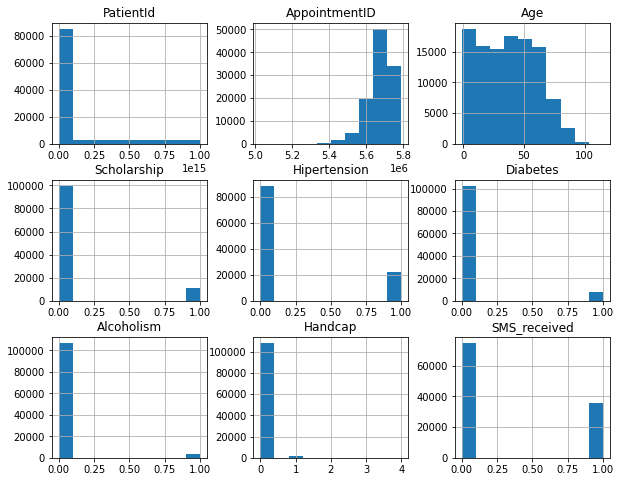

In [17]:
df.hist(figsize = (10,8))
plt.show()

In the above plot showing that Age column is more skewed to the left.
columns are in boolean fromat: 1 is True and 0 is False
Only few people have a scholarship.
Maximum people do not have Diabetes, Alcoholism and handcap: 
Most of the people get 0 messages for their appointments, 



Renaming column name 

In [18]:
df.rename(columns = {'No-show': 'No_show'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


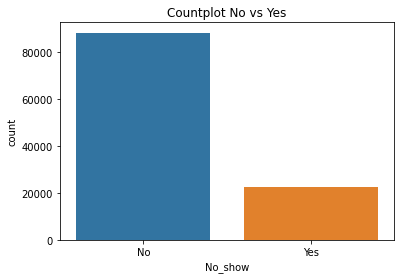

In [19]:
sns.countplot('No_show', data = df)
plt.title("Countplot No vs Yes")
plt.show()


In No_show column, there are two values 'No' and 'Yes'. In that dataset No means people they showed up on their appoinment and Yes means people didn't show up. Only few people didn't show up on their appointments

In [20]:
df.groupby('No_show')['Age'].value_counts()

No_show  Age
No       0      2900
         1      1858
         52     1449
         56     1372
         2      1366
                ... 
Yes      95        6
         115       3
         97        2
         96        1
         98        1
Name: Age, Length: 204, dtype: int64

In [21]:
df.query('Age <= 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
59,71844284745331,5638545,F,2016-04-29T08:08:43Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
63,236623344873175,5628286,M,2016-04-27T10:46:12Z,2016-04-29T00:00:00Z,0,SÃO BENEDITO,0,0,0,0,0,0,No
64,188517384712787,5616082,M,2016-04-25T13:28:21Z,2016-04-29T00:00:00Z,0,ILHA DAS CAIEIRAS,0,0,0,0,0,1,No
65,271881817799985,5628321,M,2016-04-27T10:48:50Z,2016-04-29T00:00:00Z,0,CONQUISTA,0,0,0,0,0,0,No
67,86471282513499,5639264,F,2016-04-29T08:53:02Z,2016-04-29T00:00:00Z,0,NOVA PALESTINA,0,0,0,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110345,147395196662956,5702537,F,2016-05-16T12:30:58Z,2016-06-01T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110346,5577525313231,5777724,M,2016-06-06T14:22:34Z,2016-06-08T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110454,614245995575,5772400,F,2016-06-03T15:18:44Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No
110460,43218463343323,5769545,F,2016-06-03T08:56:51Z,2016-06-03T00:00:00Z,0,RESISTÊNCIA,0,0,0,0,0,0,No


In [22]:
df.query('Age ==-1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
99832,465943158731293,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [23]:
df.loc[(df.Age == -1),'Age']=df['Age'].mean()

In the Age column lots of 0 values and one value is -1. From the mentor help page got help to deal with it.

In [25]:
df.query('Age==-1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show


In [26]:
df['Age'] = df['Age'].astype(int)     #convert age float to int.

In [27]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  103
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No_show                2
dtype: int64

In [28]:
df['SMS_received'] = df['SMS_received'].astype(int)

In [29]:
df['Scholarship'] = df['Scholarship'].astype(int)

In [30]:
disease= ['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']  #converting float to int of disease columns
for i in disease:
  df[i] = df[i].astype(int)

In [31]:
df.dtypes

PatientId          int64
AppointmentID      int64
Gender            object
ScheduledDay      object
AppointmentDay    object
Age                int64
Neighbourhood     object
Scholarship        int64
Hipertension       int64
Diabetes           int64
Alcoholism         int64
Handcap            int64
SMS_received       int64
No_show           object
dtype: object

Converting appointmentday and scheduleday to datetime columns,
make seprate columns 'Day' and 'Time' for these two columns.

In [32]:

df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [33]:
df['Sch_Day'] = df['ScheduledDay'].dt.day_name() 
df['Appt_Day'] = df['AppointmentDay'].dt.day_name()
df[['Sch_Day', 'Appt_Day']].head(5)

,Sch_Day,Appt_Day
0,Friday,Friday
1,Friday,Friday
2,Friday,Friday
3,Friday,Friday
4,Friday,Friday


In [34]:
df['no_show'] = df['No_show'].map({'No': 1, 'Yes': 0}).astype(int) 


In [35]:
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Sch_Day,Appt_Day,no_show
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Friday,1


**Exploratory Data Analysis**

Text(0.5, 1.0, 'Attributes correlations by heatmap')

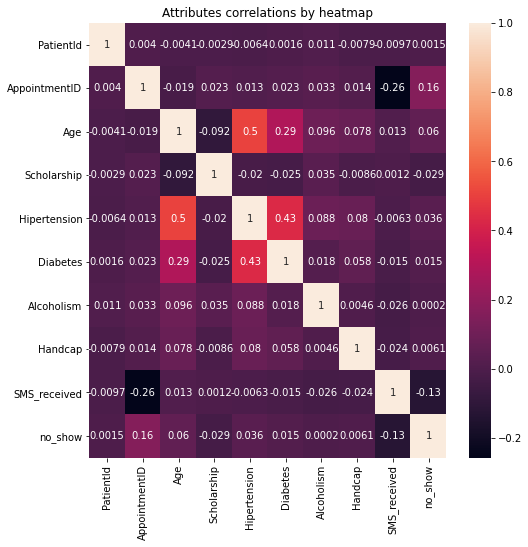

In [36]:
plt.figure(figsize=(8,8))
correlation = df.corr()
sns.heatmap(correlation, annot=True)
plt.title('Attributes correlations by heatmap')

Positive correlated variables are age and hipertension, diabetes and hipertension, other attributes are slightly positive correlated. Age between PatientId, appointmentId are negativly correlated.

In [37]:
pd.value_counts(df['No_show'])

No     88208
Yes    22319
Name: No_show, dtype: int64

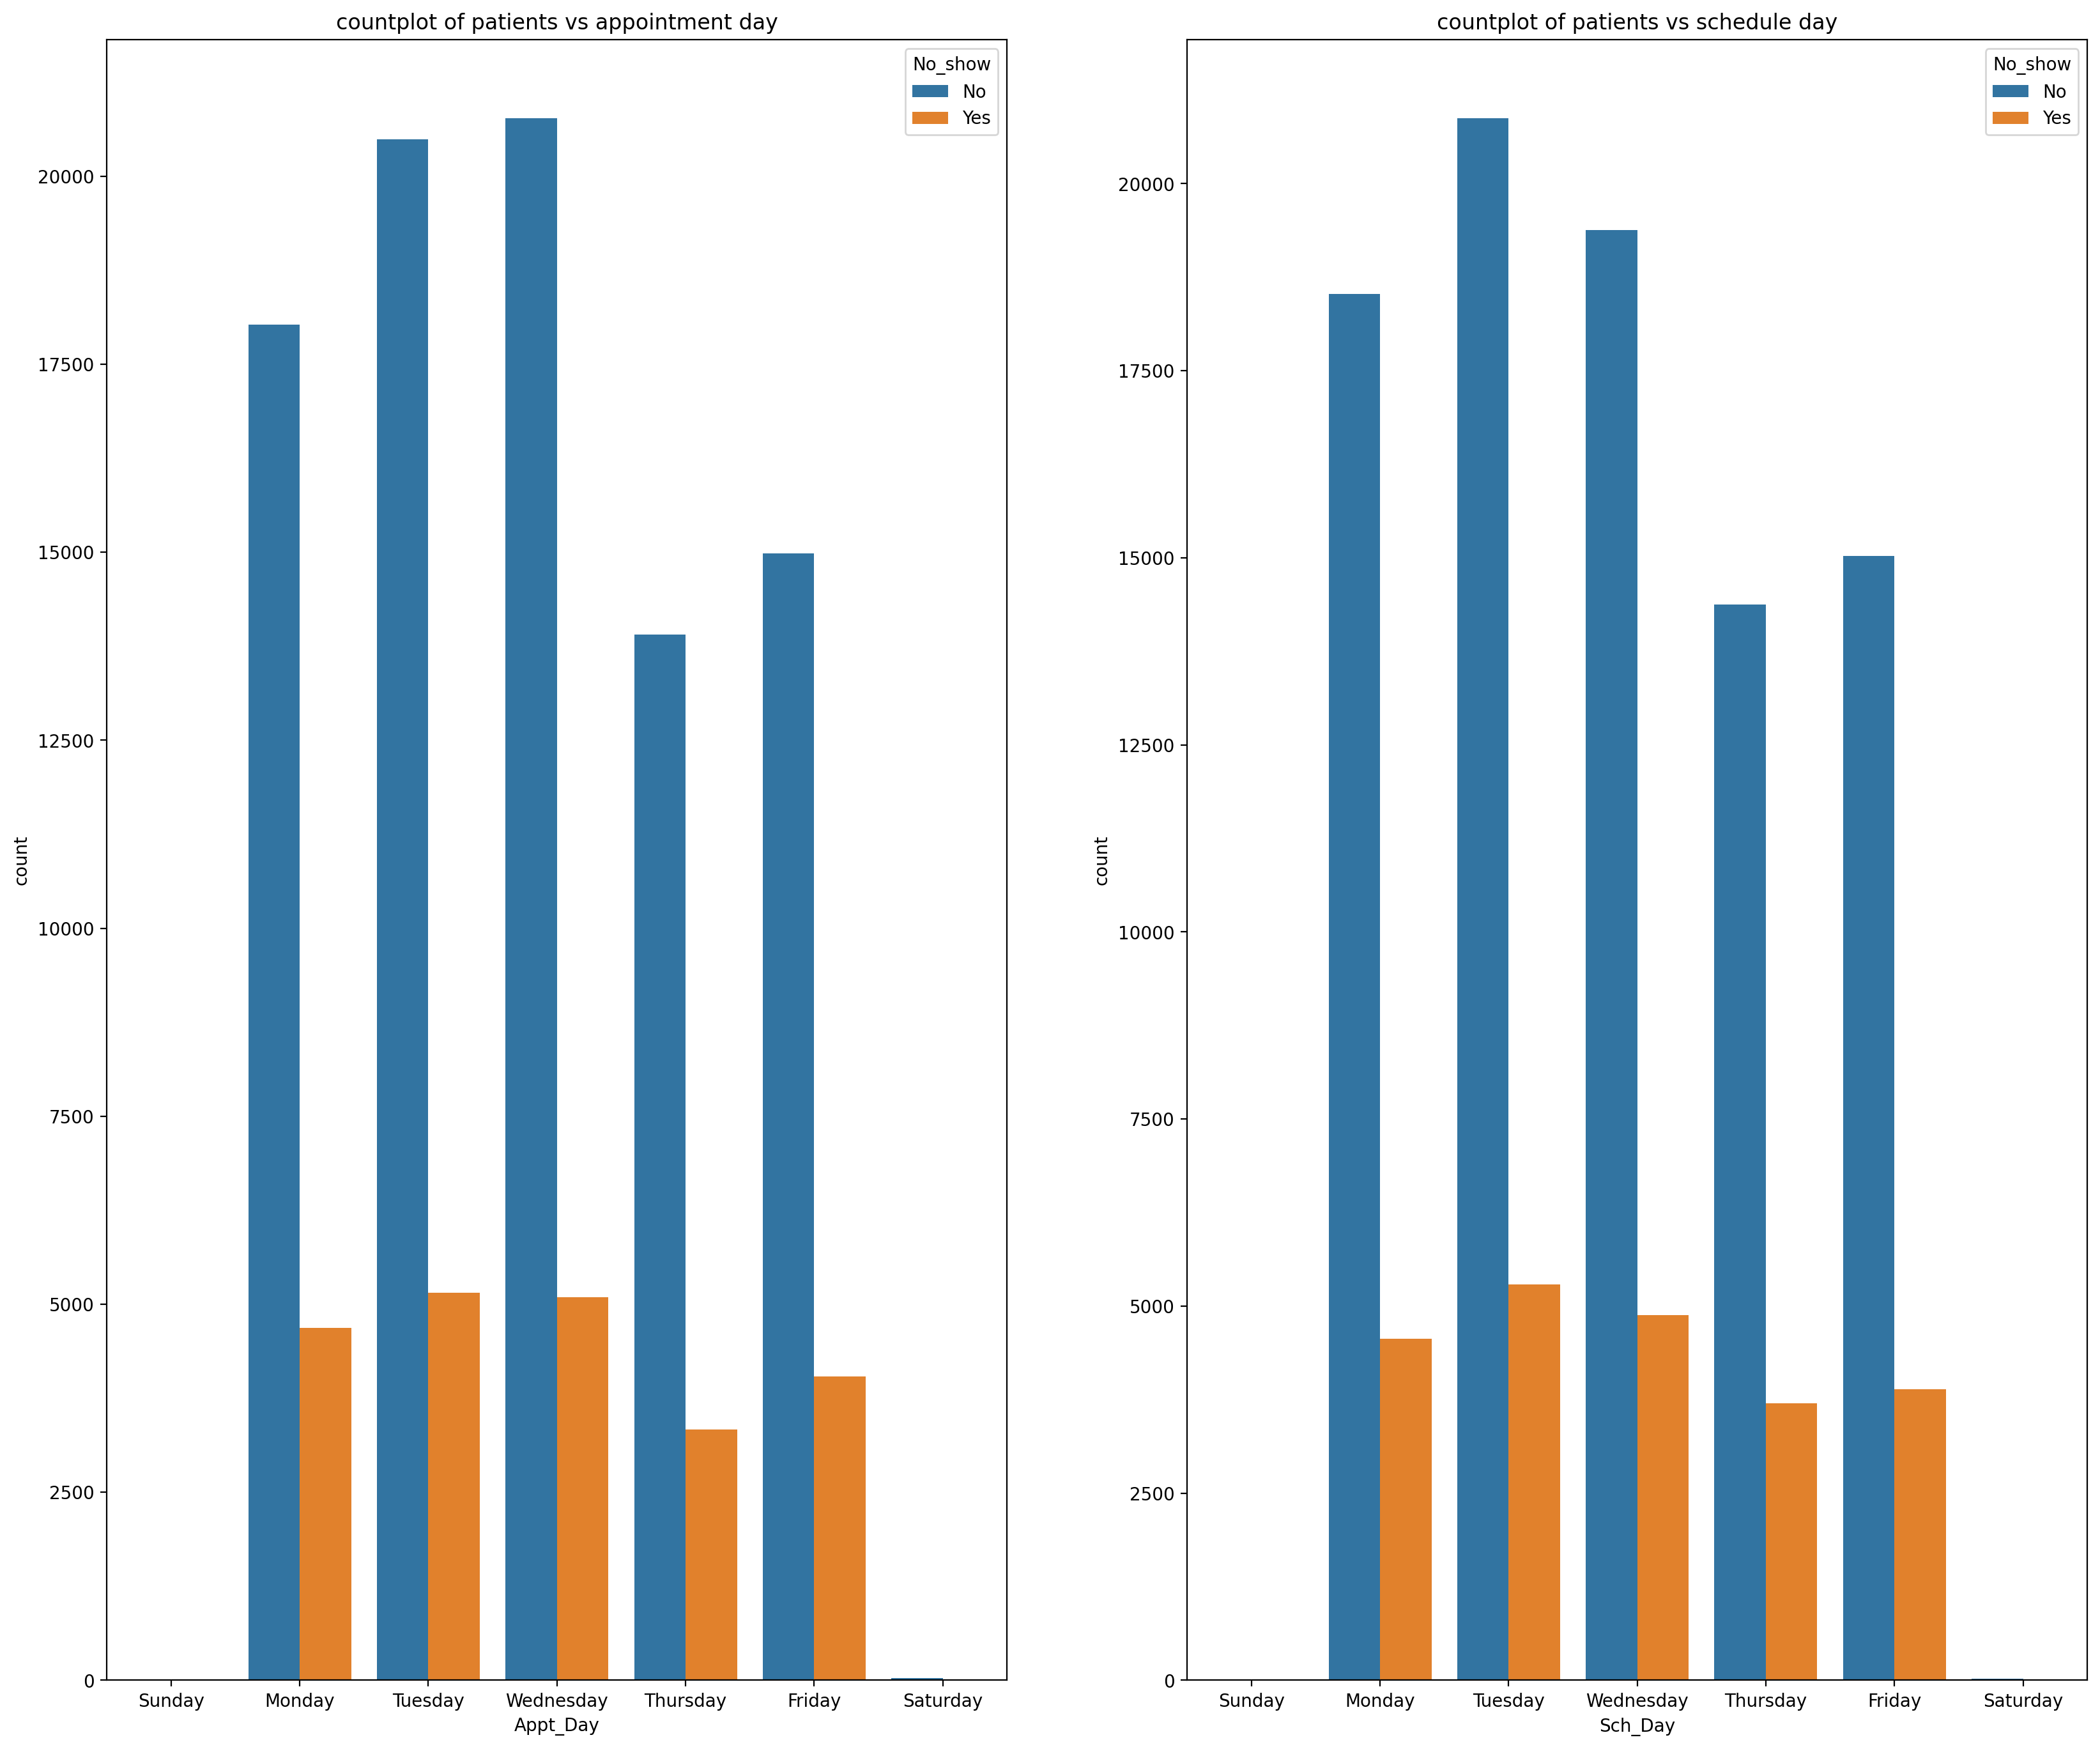

In [38]:
fig,ax = plt.subplots(1,2, figsize=(20,17), dpi = 200)
sns.countplot(x = df['Appt_Day'], hue = 'No_show', order=['Sunday', 'Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday','Saturday'], data = df, ax = ax[0])
sns.countplot(x = df['Sch_Day'], hue = 'No_show', order=['Sunday', 'Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday','Saturday'], data = df, ax = ax[1])
ax[0].set_title("countplot of patients vs appointment day")
ax[1].set_title("countplot of patients vs schedule day")
fig.show()

Countplot shows, around 21000 patients made appointment on Tuesdays and Wednesdays, 5000 patients did not make appointment on these days.Around 13000 patients make appointment on Thursdays.
Around 22000 patients got schedule on Tuesdays, Around 2200 patients did not have schedule on Thursdays, There is no Appointment and Schedule on Saturdays and Sundays.

Text(0.5, 1.0, 'Countplot of Gender vs No show(Yes/No) appointment')

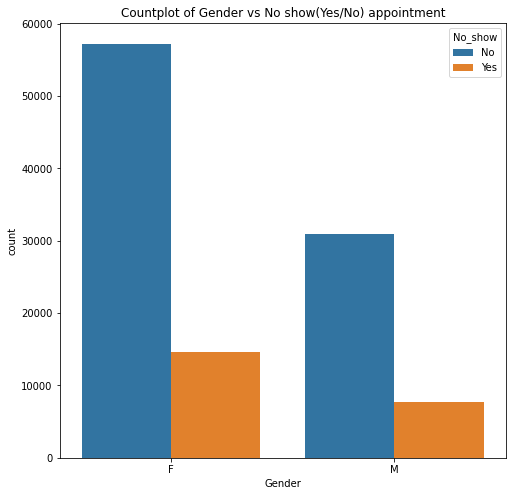

In [39]:
plt.figure(figsize=(8,8))
sns.countplot(x = df['Gender'], hue='No_show', data = df)
plt.title('Countplot of Gender vs No show(Yes/No) appointment')


In [41]:
total_gender = df['Gender'].value_counts().sum()
total_gender

110527

In [42]:
female = df.query('Gender == "F"').value_counts().sum()
male = df.query('Gender == "M"').value_counts().sum()
female,male

(71840, 38687)

In [47]:
prop_female = female/total_gender
prop_male = male/total_gender
prop_female, prop_male

(0.6499769287142508, 0.35002307128574917)

Text(0.5, 1.0, 'Gender proportion of patients')

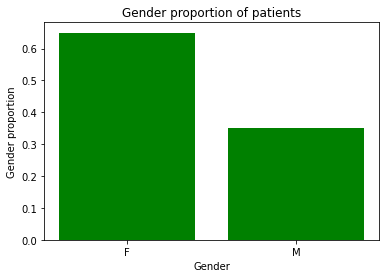

In [48]:
plt.bar(["F", "M"], [prop_female,prop_male], color = 'g')
plt.xlabel('Gender')
plt.ylabel('Gender proportion')
plt.title('Gender proportion of patients')

In the dataset,females values are almost double to male values. 
In the countplot, 58000 females and 30000 male showed up on their appointment/schedule day, while 16000 females and 9000 males missed their appointment/schedule date.

Text(0.5, 1.0, 'Bar plot of average age vs showing appointment(Yes/NO)')

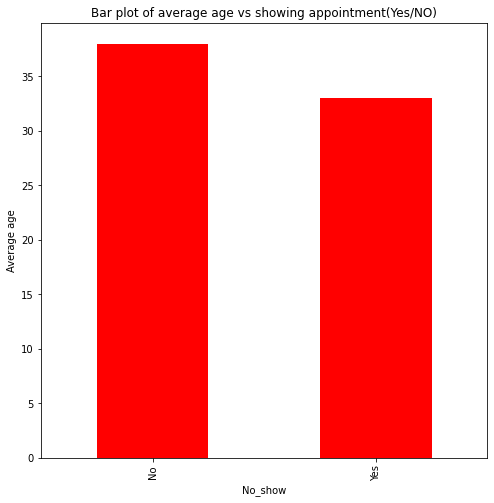

In [50]:
plt.figure(figsize =(8,8))
df.groupby('No_show')['Age'].median().plot(kind = 'bar', color = 'red')
plt.ylabel('Average age')
plt.title('Bar plot of average age vs showing appointment(Yes/NO)')

In bar plot of average age vs showing appointment(Yes/NO), 
patients over the average age, they showed up on their appointment, below average age didn't show up.

In [81]:
top_neighbour = df['Neighbourhood'].head(3)
top_neighbour

0    JARDIM DA PENHA
1    JARDIM DA PENHA
2      MATA DA PRAIA
Name: Neighbourhood, dtype: object

In [80]:
show_up = df.No_show == True
notshow_up = df.No_show == False

ValueError: ignored

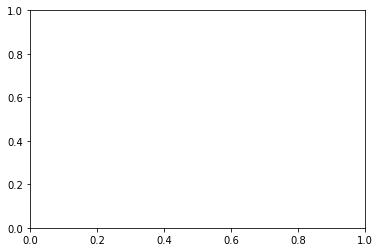

In [104]:
disease= ['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']
labels = ['Hipertension' 'No_Hipertension','Diabetes', 'No_Diabetes', 'Alcoholism', 'NO_Alcoholism', 'Handcap', 'No_Handcap']
show_up = df[df['No_show']== 0]
x = []
for i in ['Hipertension', 'Diabetes', 'Alcoholism']:
  x.extend(show_up[i].value_counts())
notshow_up = df[df['No_show']== 1]
y = []
for i in ['Hipertension', 'Diabetes', 'Alcoholism'] :
  y.extend(notshow_up[i].value_counts())
plt.bar([1,2,3,4,5,6,7,8], x, tick_label = labels, label='No')
plt.bar([1,2,3,4,5,6,7,8], y, tick_label = labels, label='Yes')

In [108]:
columns = ['Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']
pos = np.arange(8)
var_one = np.array([1,2,3,4,5,6,7,8])
var_two = np.array([0, 1,2,3,4,5,6,7,8])


plt.bar(pos, np.add(np.add(var_one, var_two), var_one), color='yellow', edgecolor='yellow')
plt.bar(pos, np.add(var_two, var_one), color='purple', edgecolor='purple')
plt.bar(pos, var_one, color='green', edgecolor='green')
plt.xticks(pos, columns)
plt.show()


ValueError: ignored

In [107]:
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64